In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
#from scipy.sparse.linalg import eigsh, expm_multiply, expm

In [64]:
import importlib

import sys
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/Chebyshev')
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI')
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/Chebyshev")
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI")


import ED_Cs_Lsites as ED
import TCI_Lsite_accumulative_v1 as TCI

importlib.reload(ED)
importlib.reload(TCI)


<module 'TCI_Lsite_accumulative_v1' from '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI/TCI_Lsite_accumulative_v1.py'>

In [65]:
# define Hamiltonian terms
L = 11
dt = 1e-2
models = ['J = 1, g = 2 , Ising Model Ham. = H','J =1 g = 2 Ham. = H - k*Hzz', 'J = 1 g = 0.5, Ham. = H - h * Hxx', 'J = 1 g = 0.5, Ham. = H - k*Hzz - h*Hxx']
threshold = 30
D = L


### Model 0: Error vs N at fixed number of evaluations (fixed iterations)

In [80]:
nlist = np.arange(8,13,1)
Nlist = [2**n for n in nlist]
iterlist = [1,2,3,4,5,6,7,8,9,10]
err2list = [[] for i in iterlist]
errmaxlist = [[] for i in iterlist]

H = ED.gen_Ham(L = L, model = 0)
for n in nlist:
    Cs = ED.correlator(H= H, L = L, dt = dt,  n = n)
    func_vals = Cs.T #Cs is in the form (X,T)
    f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]
    for idx, i in enumerate(iterlist):  
        func = TCI.function(f_t)
        _, _, _, err_2, err_max, _ = TCI.accumulative_tensor_cross_interpolation(func,         # function to be interpolated
                                        func_vals,    
                                        D,
                                        L=n,          # number of MPS tensors
                                        iters=i)
        
        err2list[idx].append(err_2)
        errmaxlist[idx].append(err_max)        

Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  -3.898796233890502e-15
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.2306228555857445
err_2:  0.23971283525840867
eval/D:  48

repeated evaluations:  100
unique evaluations 48
unique + repeated:  148
total evaluations:  148

(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.016283349854050926
err_2:  0.017467425608111625
eval/D:  84

repeated evaluations:  376
unique evaluations 84
unique + repeated:  460
total evaluations:  460

(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.002358433146851382
err_2:  0.0021713204545500747
eval/D:  128

repeated evaluations:  848
unique evaluations 128
unique + repeated:  976
total evaluations:  976

(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.00044410276773562365
err_2:  0.00023729192574916124
eval/D:  160

repeated evaluations:  1528
unique evaluations 160
unique + repeated:  1688
total evaluations:  1688

(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  6.586129186156847e-05
err_2:  5.075006836958593e-

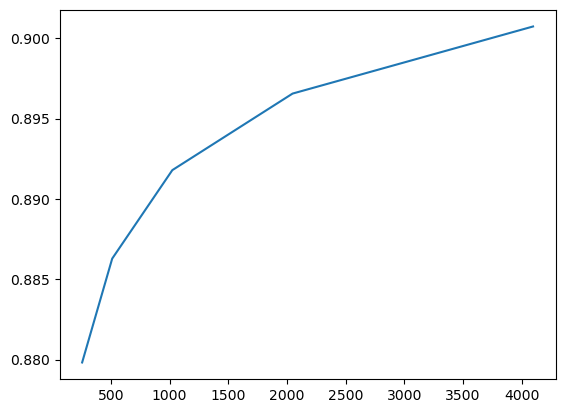

In [37]:
def exp_func(N, A, B, D):
    return A*np.exp(-1/np.sqrt(D*np.log(N))) - B


plt.plot(Nlist, [exp_func(N, 1, 0, D) for N in Nlist])

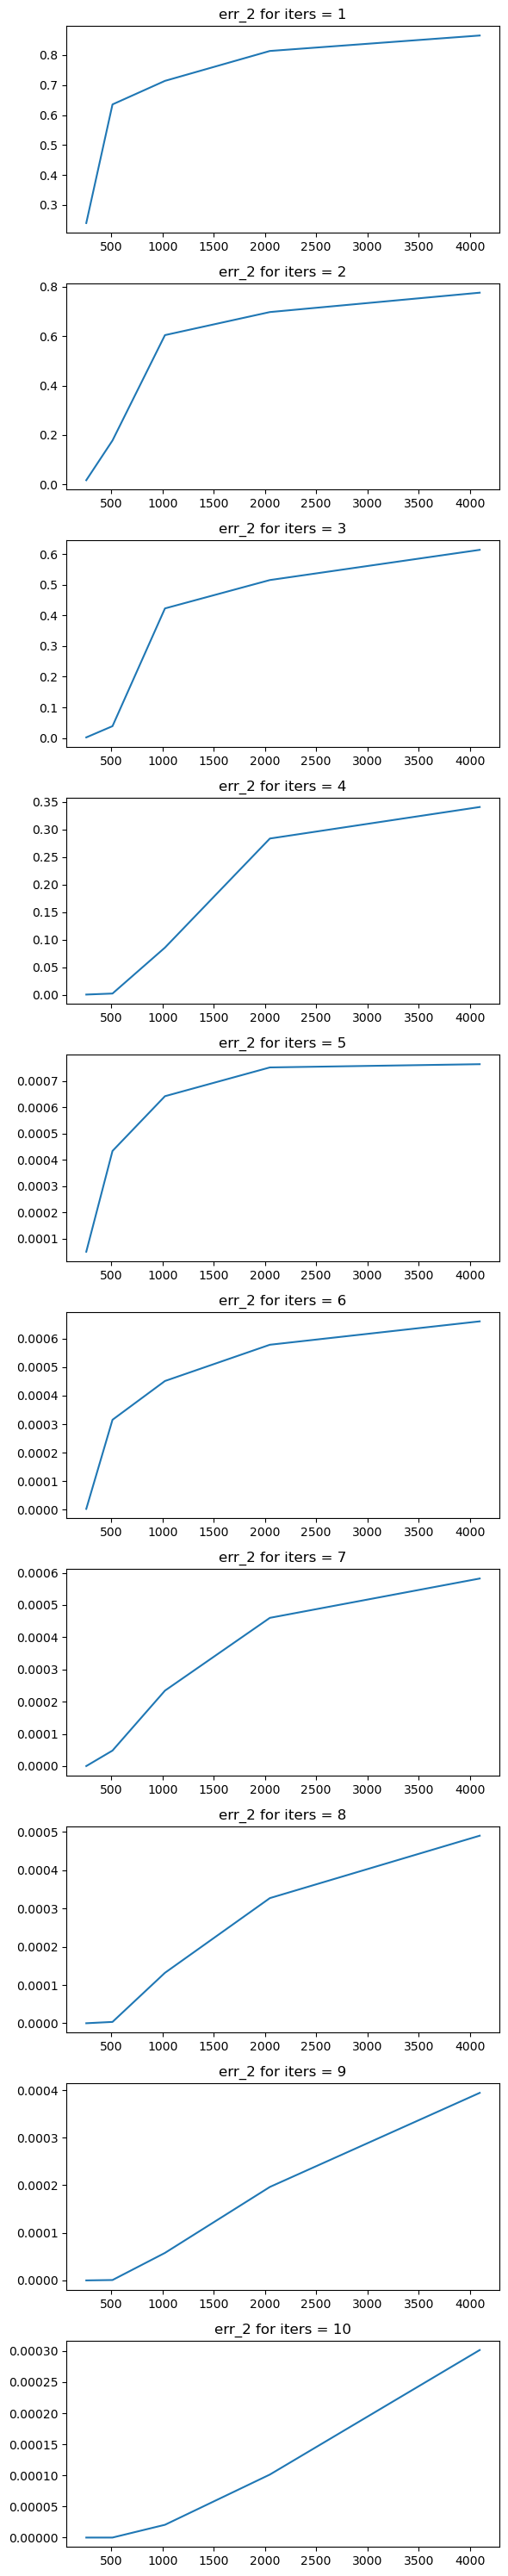

In [81]:
fig, ax = plt.subplots(len(iterlist), 1, figsize = (6, 3*len(iterlist)))

for idx, i in enumerate(iterlist):
    ax[idx].plot(Nlist, err2list[idx])
    ax[idx].set_title(f'err_2 for iters = {i}')

#plt.plot(Nlist, [exp_func(N,11,6.9, 1) for N in Nlist])
fig.tight_layout()

### # of evals(N) at fixed error! (run until err < err_threshold)

In [83]:
import TCI_Lsite_accumulative_v1_err_threshold as TCI_err

importlib.reload(TCI_err)


<module 'TCI_Lsite_accumulative_v1_err_threshold' from '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI/TCI_Lsite_accumulative_v1_err_threshold.py'>

In [76]:
errlist = [10**(-i) for i in range(1,10,1)]
print(errlist)

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]


### Check how well algorithm works: 
i.e. how close the convergence error of the algorithm is w.r.t. threshold

In [82]:
n = 11
N = 2**n
H = ED.gen_Ham(L = L, model = 0)
Cs = ED.correlator(H= H, L = L, dt = dt,  n = n)
func_vals = Cs.T #Cs is in the form (X,T)
f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]
for err in errlist:
    print("err ", err)
    func = TCI_err.function(f_t)
    evals, error, err_max= TCI_err.accumulative_tensor_cross_interpolation(func,         # function to be interpolated
                            func_vals,    
                            D,
                            L=n,          # number of MPS tensors
                            threshold = err) 
    print()

Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  -7.315984406799831e-16
err  0.1
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.001266146632651782
err_2:  0.000751626589693836
unique evaluations 408

err  0.01
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.001266146632651782
err_2:  0.000751626589693836
unique evaluations 408

err  0.001
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.001266146632651782
err_2:  0.000751626589693836
unique evaluations 408

err  0.0001
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.00010062851485730013
err_2:  4.275460080844813e-05
unique evaluations 1056

err  1e-05
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  8.57993412307524e-06
err_2:  4.1907758360746784e-06
unique evaluations 1288

err  1e-06
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  7.24454322024196e-07
err_2:  2.6549838134407293e-07
unique evaluations 1536

err  1e-07
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  2.7459140785932715e-07
err_2:  8.330688440900331e-08
unique evaluations 1598

err  1e

In [84]:
nlist = np.arange(8,13,1)
Nlist = [2**n for n in nlist]
errlist = [10**(-i) for i in range(2,8,1)]
evalslist = [[] for i in errlist]


H = ED.gen_Ham(L = L, model = 0)
for n in nlist:
    Cs = ED.correlator(H= H, L = L, dt = dt,  n = n)
    func_vals = Cs.T #Cs is in the form (X,T)
    f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]
    for idx, err in enumerate(errlist):
        print("err ", err)
        func = TCI_err.function(f_t)
        evals, error, err_max= TCI_err.accumulative_tensor_cross_interpolation(func,         # function to be interpolated
                                func_vals,    
                                D,
                                L=n,          # number of MPS tensors
                                threshold = err) 
        evalslist[idx].append(evals)
        


Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  -3.560154522362711e-16
err  0.01
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.0023584331468369415
err_2:  0.0021713204545465064
unique evaluations 128
err  0.001
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.00044410276773864386
err_2:  0.00023729192574878228
unique evaluations 160
err  0.0001
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  6.586129185954487e-05
err_2:  5.075006836849819e-05
unique evaluations 192
err  1e-05
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  3.248665991317839e-06
err_2:  2.80472690978037e-06
unique evaluations 224
err  1e-06
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  4.891307052787102e-07
err_2:  2.709418402305929e-07
unique evaluations 256
err  1e-07
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  5.599818262649687e-08
err_2:  2.964090771629968e-08
unique evaluations 256
Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  8.879020340201405e-16
err  0.01
(1, 2, 1, 11)
(1, 2, 1)
(1, 2, 1)
err_max:  0.00291261

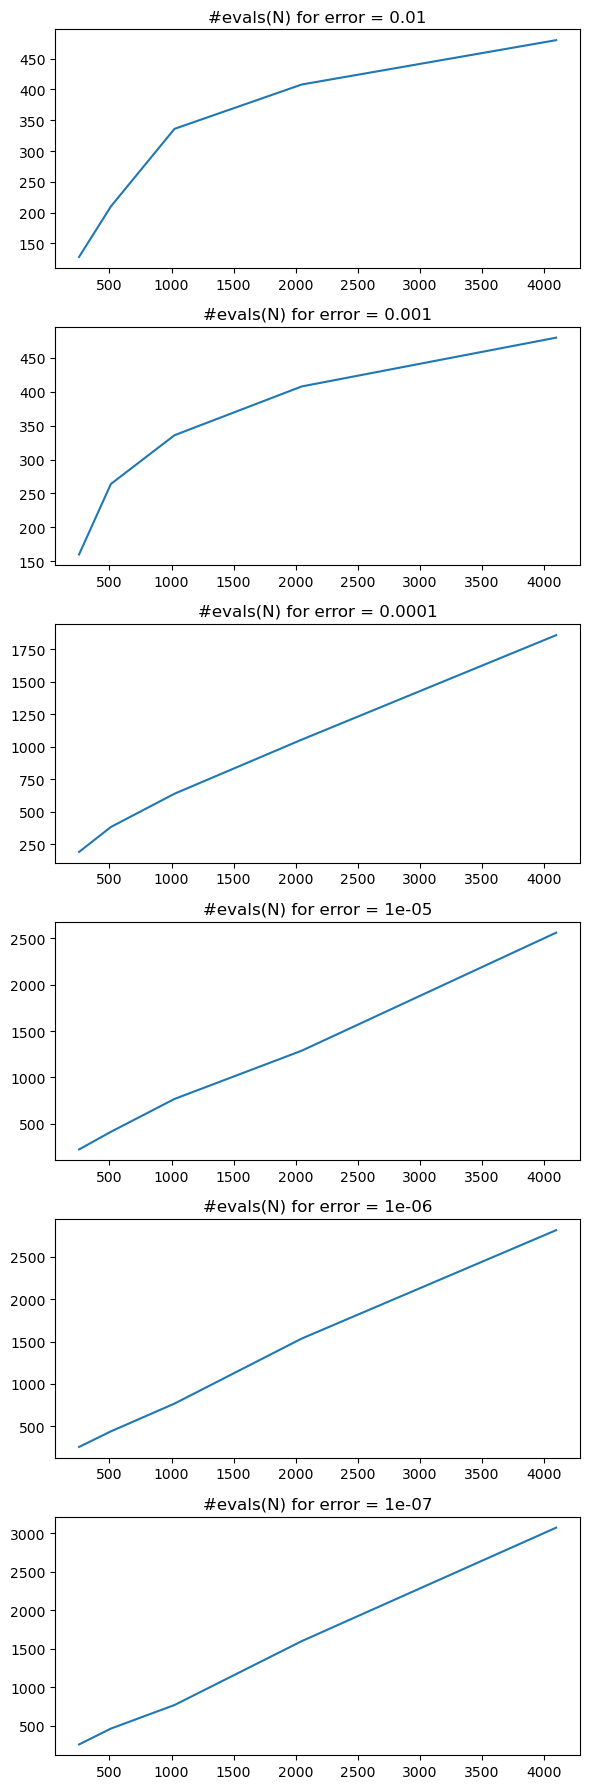

In [85]:
fig, ax = plt.subplots(len(errlist), 1, figsize = (6, 3*len(errlist)))

for idx, i in enumerate(errlist):
    ax[idx].plot(Nlist, evalslist[idx])
    ax[idx].set_title(f'#evals(N) for error = {i}')

#plt.plot(Nlist, [exp_func(N,11,6.9, 1) for N in Nlist])
fig.tight_layout()